In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split, cross_val_score

data = pd.read_csv("/Users/maiphuong/Library/CloudStorage/OneDrive-ThuyloiUniversity/Learn/Python/DA_TTNT/KTM/water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# 1. Tiền Xử lý dữ liệu

## 1.1. Xử lý Missing data

In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
#Sử dụng thuật toán KNN để điền dữ liệu mising
numeric_columns = data.select_dtypes(include = [np.number, 'float']).columns.to_list()
selected_data = data[numeric_columns]

knn = KNNImputer(n_neighbors = 5)
filled_data = knn.fit_transform(selected_data)
filled_df = pd.DataFrame(filled_data, columns = numeric_columns)

filled_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [7]:
filled_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 1.2. Xử lý outlier data

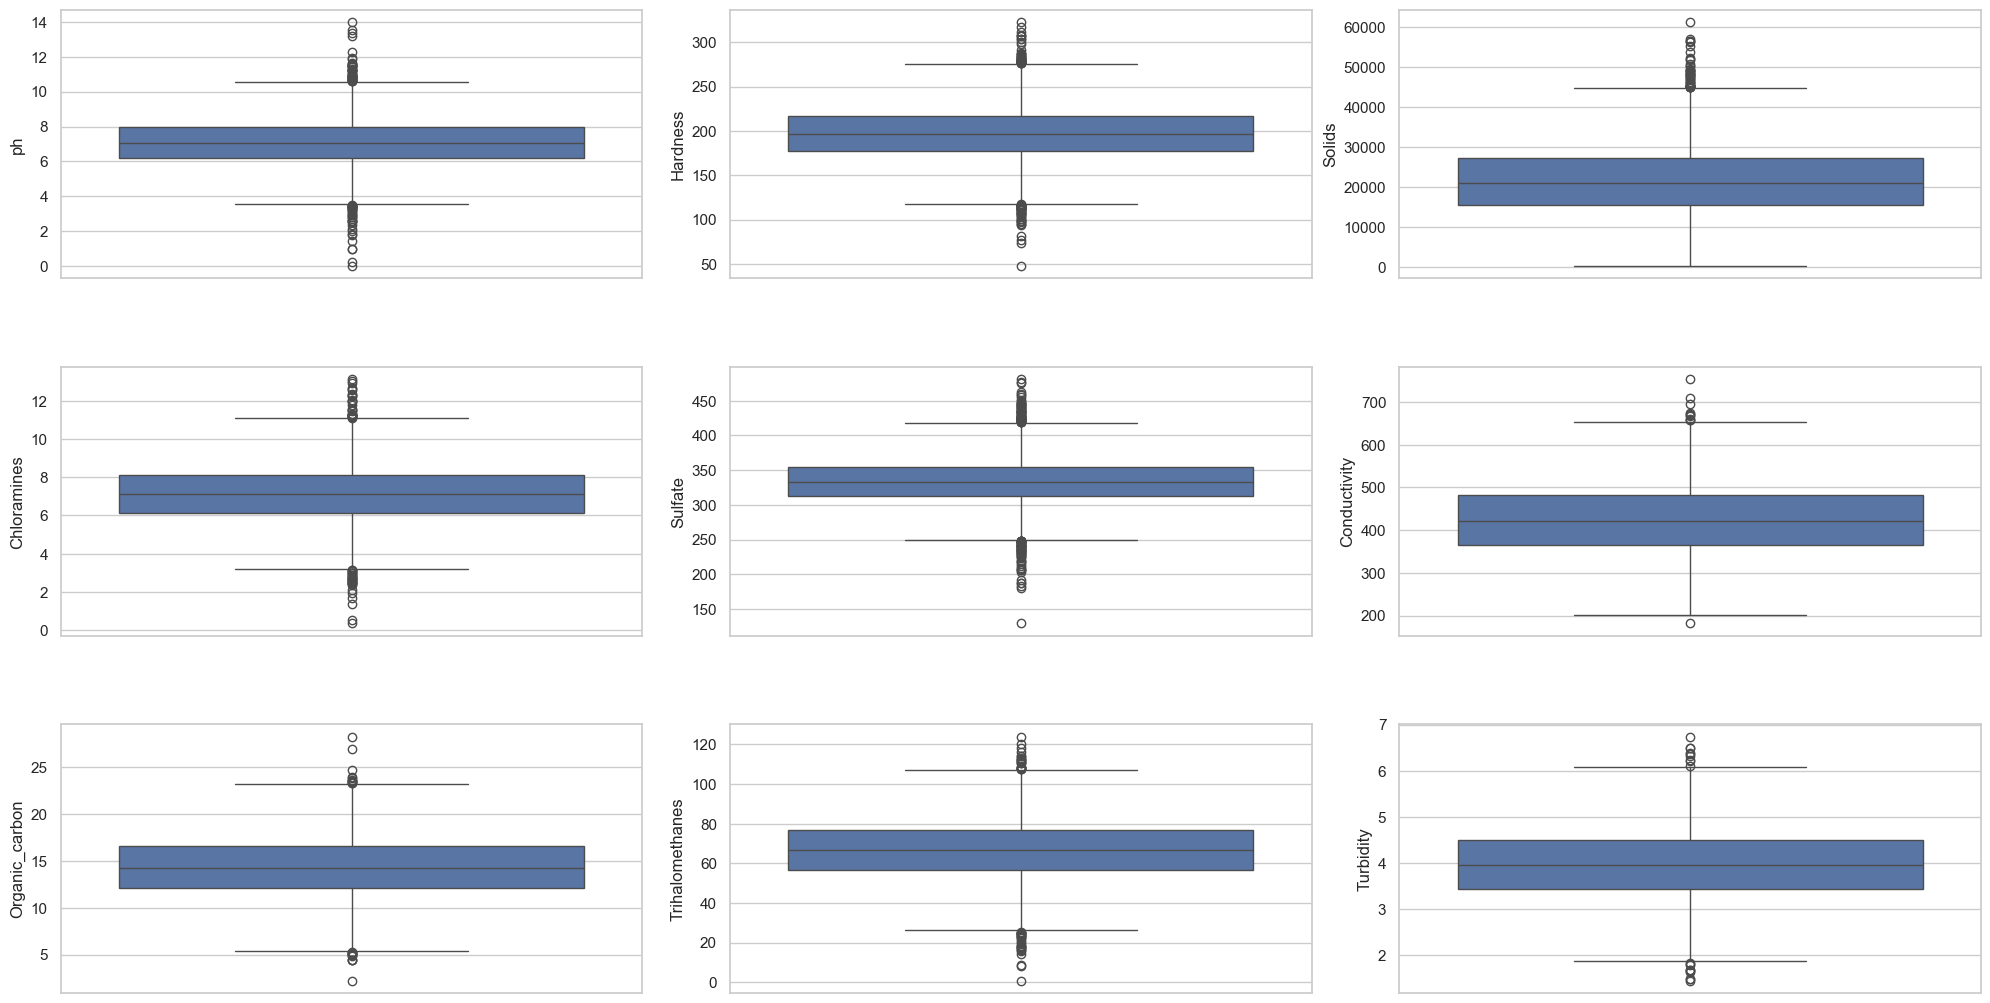

In [8]:
sns.set_theme(style="whitegrid")

data_1 = filled_df.drop('Potability', axis = 1)

fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in data_1.items():
    sns.boxplot(y=col, data=data_1, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [9]:
for col, value in data_1.items():
    IQR = data_1[col].quantile(0.75) - data_1[col].quantile(0.25)

    lower_limit = data_1[col].quantile(0.25) - (IQR * 1.5)
    upper_limit = data_1[col].quantile(0.75) + (IQR * 1.5)

    data_1[col]= np.where(data_1[col] > upper_limit, upper_limit, np.where(data_1[col] < lower_limit, lower_limit, data_1[col]))

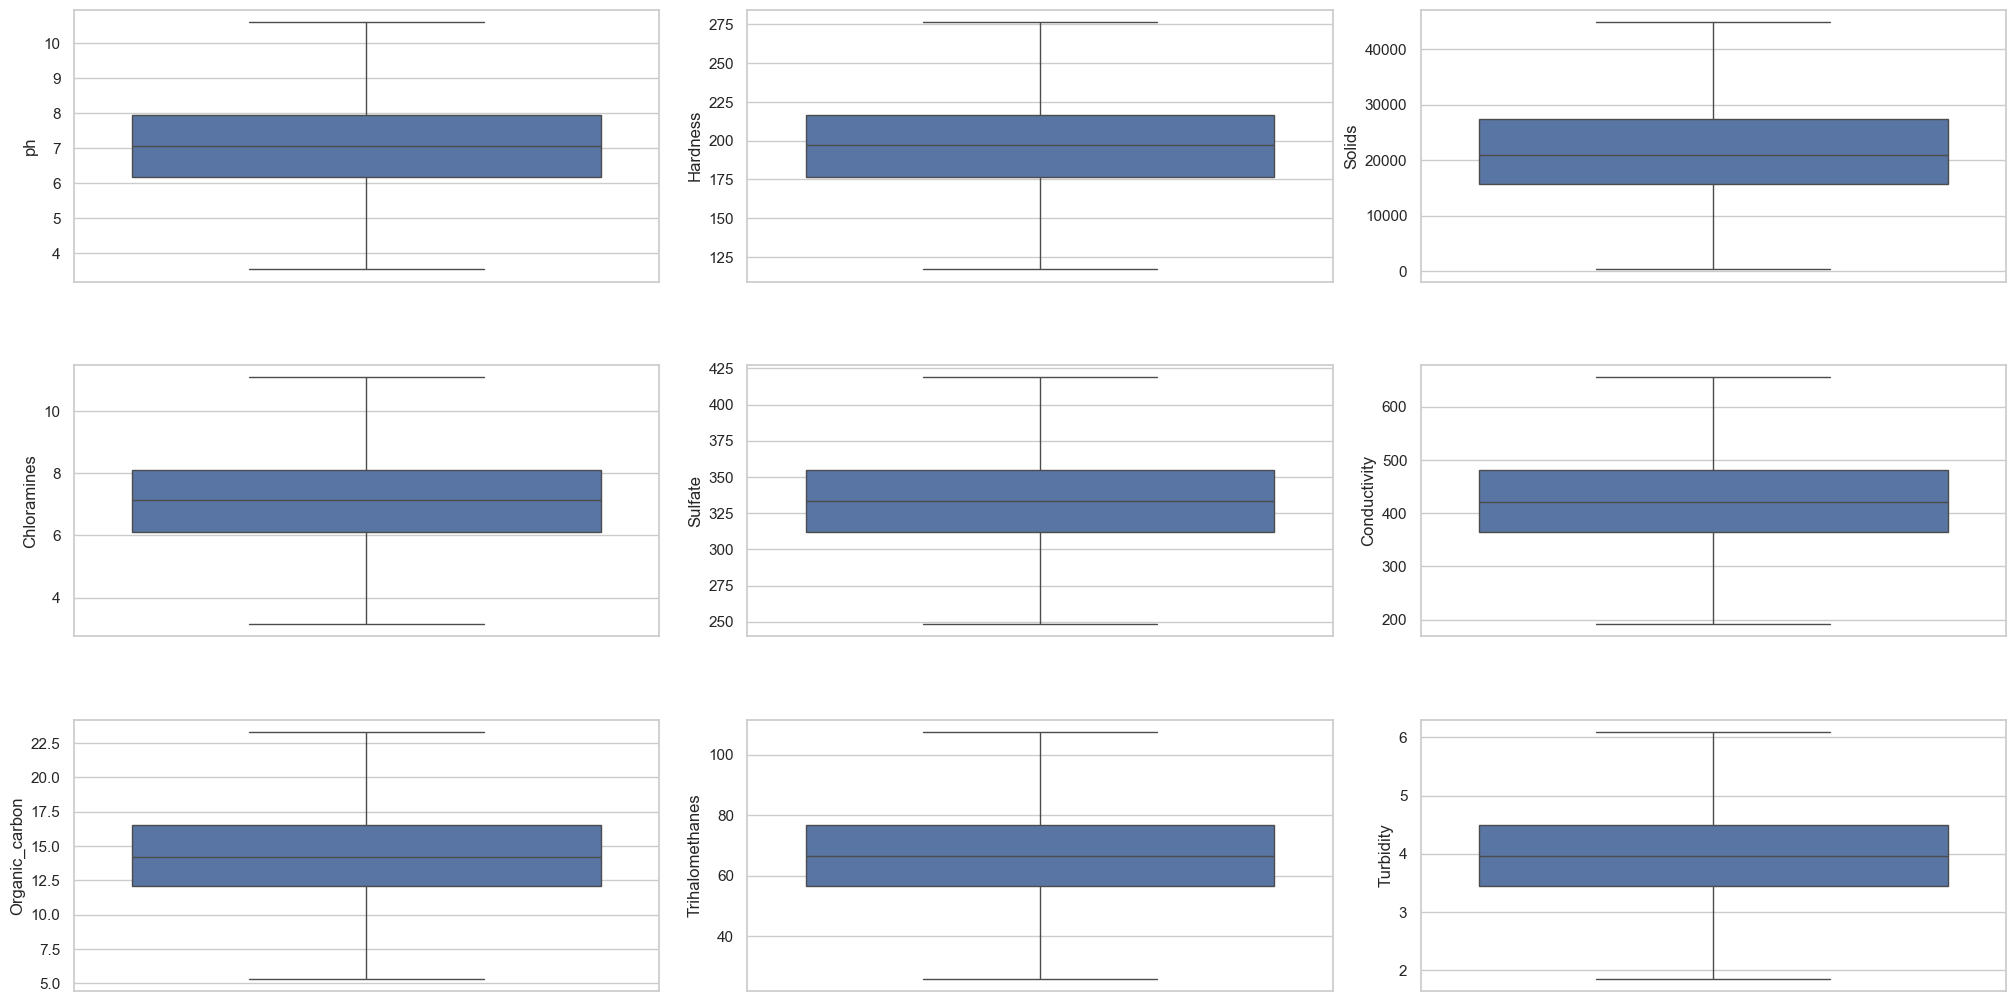

In [10]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in data_1.items():
    sns.boxplot(y=col, data=data_1, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

## 1.3. Xử lý mất cân bằng

Potability
0.0    1998
1.0    1278
Name: count, dtype: int64


<Axes: xlabel='Potability', ylabel='count'>

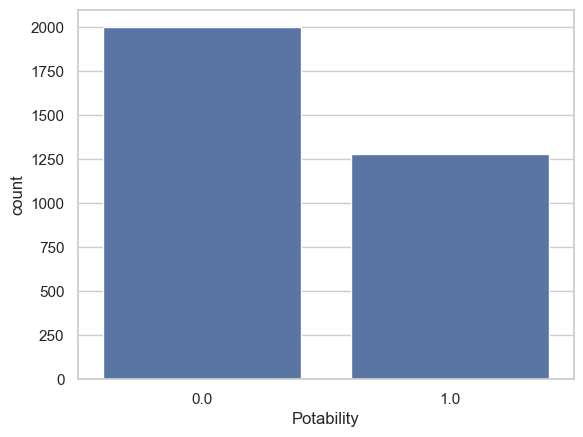

In [11]:
count=filled_df['Potability'].value_counts()
print(count)
sns.countplot(x='Potability', data=filled_df)

Potability
0.0    1998
1.0    1998
Name: count, dtype: int64


<Axes: xlabel='Potability', ylabel='count'>

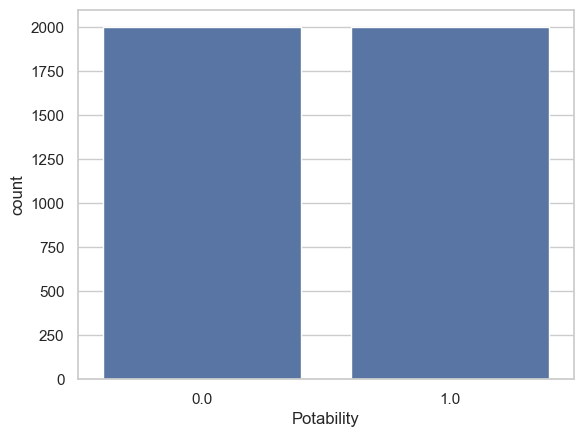

In [12]:
from imblearn.over_sampling import SMOTE

X = filled_df.drop('Potability', axis=1)
y = filled_df['Potability']

smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X, y)

data_update = pd.concat([pd.DataFrame(X_os, columns=X.columns), pd.Series(y_os, name='Potability')], axis=1)

count=data_update['Potability'].value_counts()
print(count)
sns.countplot(x='Potability', data=data_update)

In [13]:
data_update.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


# 2. Xây dựng mô hình

## 2.1. Viết hàm

### LSTM

In [15]:
def create_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

### GWO

In [14]:
class GWO:
    def __init__(self, num_wolves, dim, max_iter):
        self.num_wolves = num_wolves
        self.dim = dim
        self.max_iter = max_iter
        self.positions = np.random.uniform(low=0.0, high=1.0, size=(num_wolves, dim))
        self.alpha_position = np.zeros(dim)
        self.beta_position = np.zeros(dim)
        self.delta_position = np.zeros(dim)
        self.alpha_score = float('inf')
        self.beta_score = float('inf')
        self.delta_score = float('inf')

    def fitness(self, position, X_train, y_train):
        selected_features = np.where(position > 0.5, 1, 0)
        if np.sum(selected_features) == 0:
            return float('inf')
        X_train_selected = X_train[:, selected_features == 1]
        svm_classifier = SVC()
        scores = cross_val_score(svm_classifier, X_train_selected, y_train, cv=5, scoring='accuracy')
        return -np.mean(scores)  # Giảm thiểu độ chính xác âm

    def optimize(self, X_train, y_train):
        for iteration in range(self.max_iter):
            for i in range(self.num_wolves):
                fitness_value = self.fitness(self.positions[i], X_train, y_train)
                if fitness_value < self.alpha_score:
                    self.delta_score = self.beta_score
                    self.delta_position = self.beta_position.copy()
                    self.beta_score = self.alpha_score
                    self.beta_position = self.alpha_position.copy()
                    self.alpha_score = fitness_value
                    self.alpha_position = self.positions[i].copy()
                elif fitness_value < self.beta_score:
                    self.delta_score = self.beta_score
                    self.delta_position = self.beta_position.copy()
                    self.beta_score = fitness_value
                    self.beta_position = self.positions[i].copy()
                elif fitness_value < self.delta_score:
                    self.delta_score = fitness_value
                    self.delta_position = self.positions[i].copy()

            for i in range(self.num_wolves):
                a = 2 - iteration * (2 / self.max_iter)
                for j in range(self.dim):
                    r1 = np.random.rand()
                    r2 = np.random.rand()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * self.alpha_position[j] - self.positions[i, j])
                    X1 = self.alpha_position[j] - A1 * D_alpha

                    r1 = np.random.rand()
                    r2 = np.random.rand()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * self.beta_position[j] - self.positions[i, j])
                    X2 = self.beta_position[j] - A2 * D_beta

                    r1 = np.random.rand()
                    r2 = np.random.rand()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * self.delta_position[j] - self.positions[i, j])
                    X3 = self.delta_position[j] - A3 * D_delta

                    self.positions[i, j] = (X1 + X2 + X3) / 3
            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.alpha_score}")


### PSO

In [54]:
class PSO:
    def __init__(self, num_particles, dim, max_iter):
        self.num_particles = num_particles
        self.dim = dim
        self.max_iter = max_iter
        self.positions = np.random.uniform(low=0.0, high=1.0, size=(num_particles, dim))
        self.velocities = np.zeros((num_particles, dim))
        self.personal_best_positions = self.positions.copy()
        self.personal_best_scores = np.full(num_particles, float('inf'))
        self.global_best_position = None
        self.global_best_score = float('inf')

    def fitness(self, position, X_train, y_train):
        selected_features = np.where(position > 0.5, 1, 0)
        if np.sum(selected_features) == 0:
            return float('inf')
        X_train_selected = X_train[:, selected_features == 1]
        svm_classifier = SVC()
        scores = cross_val_score(svm_classifier, X_train_selected, y_train, cv=5, scoring='accuracy')
        return -np.mean(scores)  # Minimize negative accuracy

    def optimize(self, X_train, y_train, w=0.5, c1=1.5, c2=1.5):
        for iteration in range(self.max_iter):
            for i in range(self.num_particles):
                fitness_value = self.fitness(self.positions[i], X_train, y_train)
                if fitness_value < self.personal_best_scores[i]:
                    self.personal_best_scores[i] = fitness_value
                    self.personal_best_positions[i] = self.positions[i].copy()
                if fitness_value < self.global_best_score:
                    self.global_best_score = fitness_value
                    self.global_best_position = self.positions[i].copy()
            for i in range(self.num_particles):
                r1 = np.random.rand(self.dim)
                r2 = np.random.rand(self.dim)
                self.velocities[i] = (w * self.velocities[i] +
                                      c1 * r1 * (self.personal_best_positions[i] - self.positions[i]) +
                                      c2 * r2 * (self.global_best_position - self.positions[i]))
                self.positions[i] += self.velocities[i]
                self.positions[i] = np.clip(self.positions[i], 0.0, 1.0)
            print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.global_best_score}")

### Autoencoder

In [42]:
from tensorflow.keras.layers import Input, Dense
def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = Model(input_layer, output_layer)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

## 2.2. Chạy mô hình

In [14]:
from sklearn.preprocessing import StandardScaler
# Tách tập dữ liệu thành đặc trưng và nhãn
X = data_update.drop(['Potability'], axis=1)
y = data_update['Potability']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled[0]

array([ 0.06204023,  0.26030113, -0.14397935,  0.10372625,  0.93652118,
        1.7591168 , -1.2012155 ,  1.33687218, -1.33189977])

### LSTM

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Định nghĩa và huấn luyện mô hình LSTM
lstm_input_shape = (X_train.shape[1], 1)
lstm_model = create_lstm(lstm_input_shape)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Lưu mô hình LSTM
lstm_model.save('lstm_model.h5')
print("Mô hình LSTM đã được lưu vào file 'lstm_model.h5'")

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5076 - loss: 0.6931 - val_accuracy: 0.4984 - val_loss: 0.6930
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 0.6923 - val_accuracy: 0.5078 - val_loss: 0.6924
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.6923 - val_accuracy: 0.5141 - val_loss: 0.6922
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5283 - loss: 0.6922 - val_accuracy: 0.5078 - val_loss: 0.6930
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5301 - loss: 0.6909 - val_accuracy: 0.5328 - val_loss: 0.6922
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5220 - loss: 0.6916 - val_accuracy: 0.5141 - val_loss: 0.6905
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5266 - loss: 0.6891 - val_accuracy: 0.5172 - val_loss: 0.6926
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5293 - loss: 0.6913 - val_accuracy: 0.5266 - val_loss:

Mô hình LSTM đã được lưu vào file 'lstm_model.h5'


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dự đoán và đánh giá mô hình
y_pred_prob = lstm_model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In các chỉ số đánh giá
print(f"Độ chính xác: {accuracy}")
print(f"Độ chính xác (precision): {precision}")
print(f"Độ nhạy (recall): {recall}")
print(f"Điểm F1: {f1}")

# Lưu kết quả dự đoán vào tệp CSV
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results.to_csv('predictions_lstm.csv', index=False)
print("Kết quả dự đoán đã được lưu vào tệp 'predictions_lstm.csv'")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
Độ chính xác: 0.5075
Độ chính xác (precision): 0.5075
Độ nhạy (recall): 1.0
Điểm F1: 0.6733001658374793
Kết quả dự đoán đã được lưu vào tệp 'predictions_lstm.csv'


### LSTM_GWO

In [59]:
from tensorflow.keras.models import Model
# Tạo và huấn luyện autoencoder
input_dim = X_scaled.shape[1]
autoencoder, encoder = create_autoencoder(input_dim)
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Lưu lại mô hình autoencoder và encoder
autoencoder.save('autoencoder_model.h5')
encoder.save('encoder_model.h5')

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1094 - val_loss: 0.5690
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.6757 - val_loss: 0.4890
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.6074 - val_loss: 0.4818
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.6111 - val_loss: 0.4770
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.6032 - val_loss: 0.4766
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.5917 - val_loss: 0.4759
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.6003 - val_loss: 0.4758
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.6169 - val_loss: 0.4749
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.6183 - val_loss: 0.4753
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6033 - val_loss: 0.4758
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.6183 - val_loss: 0.4752
Epoch 12/50
100/100 ━━━━━━━━━━━━━━

In [60]:
from sklearn.svm import SVC
# Mã hóa các đặc trưng
encoded_X = encoder.predict(X_scaled)
y_array = y.to_numpy()

# Thực hiện tối ưu hóa bằng GWO
gwo = GWO(num_wolves=30, dim=encoded_X.shape[1], max_iter=30)
gwo.optimize(encoded_X, y_array)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
Iteration 1/30, Best Fitness: -0.6151214017521902
Iteration 2/30, Best Fitness: -0.6203760951188986
Iteration 3/30, Best Fitness: -0.6276382978723405
Iteration 4/30, Best Fitness: -0.6301370463078849
Iteration 5/30, Best Fitness: -0.6301370463078849
Iteration 6/30, Best Fitness: -0.6301370463078849
Iteration 7/30, Best Fitness: -0.6301370463078849
Iteration 8/30, Best Fitness: -0.6301370463078849
Iteration 9/30, Best Fitness: -0.6301370463078849
Iteration 10/30, Best Fitness: -0.6301370463078849
Iteration 11/30, Best Fitness: -0.6301370463078849
Iteration 12/30, Best Fitness: -0.6301370463078849
Iteration 13/30, Best Fitness: -0.6301370463078849
Iteration 14/30, Best Fitness: -0.6301370463078849
Iteration 15/30, Best Fitness: -0.6301370463078849
Iteration 16/30, Best Fitness: -0.6301370463078849
Iteration 17/30, Best Fitness: -0.6306357947434293
Iteration 18/30, Best Fitness: -0.6306357947434293
Iteration 19/30, Best Fitness: -0.63063579474342

In [61]:
# Chọn các đặc trưng được chọn bởi GWO
selected_X = np.where(gwo.alpha_position > 0.5, 1, 0)
selected_encoded_X = encoded_X[:, selected_X == 1]

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(selected_encoded_X, y_array, test_size=0.2, random_state=42)

lstm_gwo_input_shape = (selected_encoded_X.shape[1], 1)
lstm_gwo_model = create_lstm(lstm_input_shape)

# Chuyển đổi các đặc trưng được chọn cho đầu vào của LSTM
X_train_gwo_reshaped = X_train.reshape(-1, lstm_gwo_input_shape[0], 1)
X_test_gwo_reshaped = X_test.reshape(-1, lstm_gwo_input_shape[0], 1)

# Huấn luyện mô hình LSTM
lstm_gwo_model.fit(X_train_gwo_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Lưu mô hình LSTM
lstm_gwo_model.save('lstm_gwo_model.h5')

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4935 - loss: 0.6939 - val_accuracy: 0.4844 - val_loss: 0.6932
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.6927 - val_accuracy: 0.4844 - val_loss: 0.6967
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5028 - loss: 0.6935 - val_accuracy: 0.4875 - val_loss: 0.6915
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5248 - loss: 0.6900 - val_accuracy: 0.5297 - val_loss: 0.6884
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5537 - loss: 0.6866 - val_accuracy: 0.4969 - val_loss: 0.6896
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 0.6840 - val_accuracy: 0.5375 - val_loss: 0.6856
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 0.6815 - val_accuracy: 0.5469 - val_loss: 0.6802
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5693 - loss: 0.6795 - val_accuracy: 0.4859 - val_loss:

In [62]:
# Dự đoán bằng mô hình LSTM
y_pred_gwo_prob = lstm_gwo_model.predict(X_test_gwo_reshaped)
y_pred_gwo = (y_pred_gwo_prob > 0.5).astype(int).flatten()

# Đánh giá mô hình LSTM
accuracy = accuracy_score(y_test, y_pred_gwo)
precision = precision_score(y_test, y_pred_gwo)
recall = recall_score(y_test, y_pred_gwo)
f1 = f1_score(y_test, y_pred_gwo)

# In các chỉ số đánh giá
print(f"Độ chính xác: {accuracy}")
print(f"Độ chính xác (precision): {precision}")
print(f"Độ nhạy (recall): {recall}")
print(f"Điểm F1: {f1}")

# Lưu kết quả dự đoán vào tệp CSV
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_gwo
})
results.to_csv('predictions_gwo_lstm.csv', index=False)
print("Dự đoán đã được lưu vào tệp predictions_gwo_lstm.csv")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
Độ chính xác: 0.6
Độ chính xác (precision): 0.5817490494296578
Độ nhạy (recall): 0.7536945812807881
Điểm F1: 0.6566523605150215
Dự đoán đã được lưu vào tệp predictions_gwo_lstm.csv


### LSTM_PSO

In [56]:
# Thực hiện tối ưu hóa bằng PSO
pso = PSO(num_particles=30, dim=encoded_X.shape[1], max_iter=30)
pso.optimize(encoded_X, y_array)

Iteration 1/30, Best Fitness: -0.6148726533166459
Iteration 2/30, Best Fitness: -0.6206320400500627
Iteration 3/30, Best Fitness: -0.6206320400500627
Iteration 4/30, Best Fitness: -0.6206320400500627
Iteration 5/30, Best Fitness: -0.6243886107634544
Iteration 6/30, Best Fitness: -0.6243886107634544
Iteration 7/30, Best Fitness: -0.6243886107634544
Iteration 8/30, Best Fitness: -0.6243886107634544
Iteration 9/30, Best Fitness: -0.6243886107634544
Iteration 10/30, Best Fitness: -0.6243886107634544
Iteration 11/30, Best Fitness: -0.6243886107634544
Iteration 12/30, Best Fitness: -0.624389549436796
Iteration 13/30, Best Fitness: -0.6248892365456821
Iteration 14/30, Best Fitness: -0.6253876720901126
Iteration 15/30, Best Fitness: -0.6253876720901126
Iteration 16/30, Best Fitness: -0.6253876720901126
Iteration 17/30, Best Fitness: -0.6253876720901126
Iteration 18/30, Best Fitness: -0.6253876720901126
Iteration 19/30, Best Fitness: -0.6253876720901126
Iteration 20/30, Best Fitness: -0.6253876

In [57]:
# Chọn các đặc trưng được chọn bởi PSO
selected_X = np.where(pso.global_best_position > 0.5, 1, 0)
selected_encoded_X = encoded_X[:, selected_X == 1]

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(selected_encoded_X, y_array, test_size=0.2, random_state=42)

lstm_pso_input_shape = (selected_encoded_X.shape[1], 1)
lstm_pso_model = create_lstm(lstm_pso_input_shape)

# Chuyển đổi các đặc trưng được chọn cho đầu vào của LSTM
X_train_pso_reshaped = X_train.reshape(-1, lstm_pso_input_shape[0], 1)
X_test_pso_reshaped = X_test.reshape(-1, lstm_pso_input_shape[0], 1)

# Huấn luyện mô hình LSTM
lstm_pso_model.fit(X_train_pso_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Lưu mô hình LSTM
lstm_pso_model.save('lstm_pso_model.h5')

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4796 - loss: 0.6936 - val_accuracy: 0.4844 - val_loss: 0.6978
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5089 - loss: 0.6927 - val_accuracy: 0.4969 - val_loss: 0.6936
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5214 - loss: 0.6926 - val_accuracy: 0.5141 - val_loss: 0.6942
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4904 - loss: 0.6931 - val_accuracy: 0.5141 - val_loss: 0.6946
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 0.6930 - val_accuracy: 0.4844 - val_loss: 0.7001
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4881 - loss: 0.6927 - val_accuracy: 0.5094 - val_loss: 0.6940
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5167 - loss: 0.6929 - val_accuracy: 0.4812 - val_loss: 0.6952
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5116 - loss: 0.6922 - val_accuracy: 0.5125 - val_loss:

In [58]:
# Dự đoán bằng mô hình LSTM
y_pred_pso_prob = lstm_pso_model.predict(X_test_pso_reshaped)
y_pred_pso = (y_pred_pso_prob > 0.5).astype(int).flatten()

# Đánh giá mô hình LSTM
accuracy = accuracy_score(y_test, y_pred_pso)
precision = precision_score(y_test, y_pred_pso)
recall = recall_score(y_test, y_pred_pso)
f1 = f1_score(y_test, y_pred_pso)

# In các chỉ số đánh giá
print(f"Độ chính xác: {accuracy}")
print(f"Độ chính xác (precision): {precision}")
print(f"Độ nhạy (recall): {recall}")
print(f"Điểm F1: {f1}")

# Lưu kết quả dự đoán vào tệp CSV
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_pso
})
results.to_csv('predictions_lstm_with_pso.csv', index=False)
print("Dự đoán đã được lưu vào tệp predictions_lstm_with_pso.csv")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Độ chính xác: 0.61625
Độ chính xác (precision): 0.6513761467889908
Độ nhạy (recall): 0.5246305418719212
Điểm F1: 0.5811732605729877
Dự đoán đã được lưu vào tệp predictions_lstm_with_pso.csv


### SVM

In [17]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.67


### SVM_PSO